In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets
%matplotlib notebook

# Sine

<IPython.core.display.Javascript object>


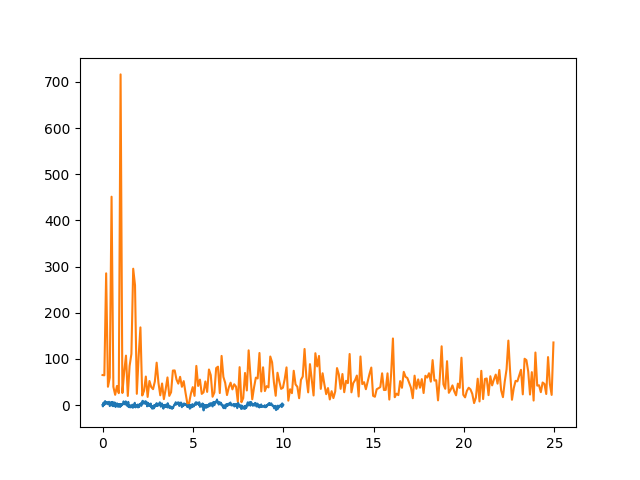

In [8]:
n = 500
x = np.linspace(0, 10, n)
spacing = x[1] - x[0]
noise = np.random.normal(0,0.5,n)

tau = 2*np.pi
y = np.zeros_like(x)
coefs = [(1, 0.2), (2, 0.5), (3, 1), (0.5, 2), (1.75, 1.75)]
for a, f in coefs:
    y += a*np.sin(f*tau*x) + noise

plt.plot(x, y)

251


<IPython.core.display.Javascript object>


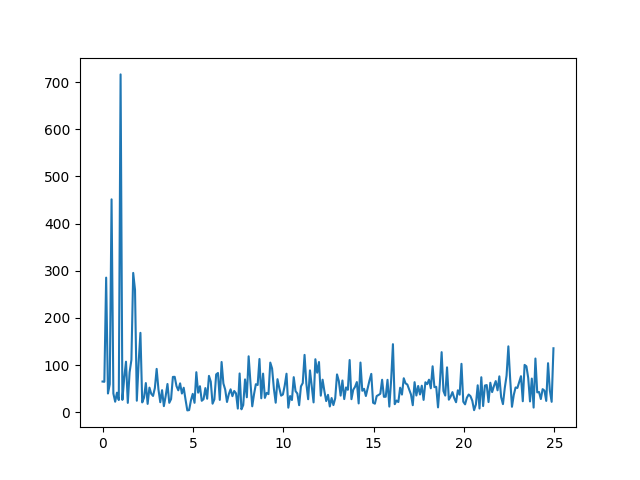

In [11]:
f = np.fft.rfft(y)
freqs = abs(np.fft.fftfreq(n, spacing)[:len(f)])
#f[abs(f) < 100] = 0
print(len(f))
plt.plot(freqs, abs(f))

<IPython.core.display.Javascript object>


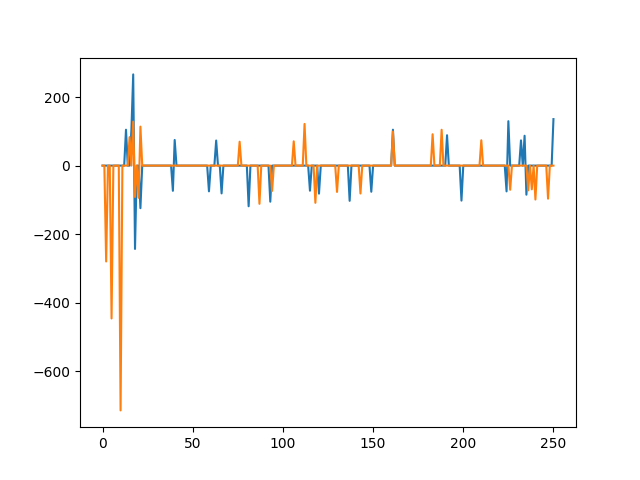

In [12]:
fr = f.real.copy()
fi = f.imag.copy()

sort_fr = np.argsort(abs(fr))
sort_fi = np.argsort(abs(fi))

fr[sort_fr[:-25]] = 0
fi[sort_fi[:-25]] = 0

plt.plot(fr)
plt.plot(fi)

<IPython.core.display.Javascript object>


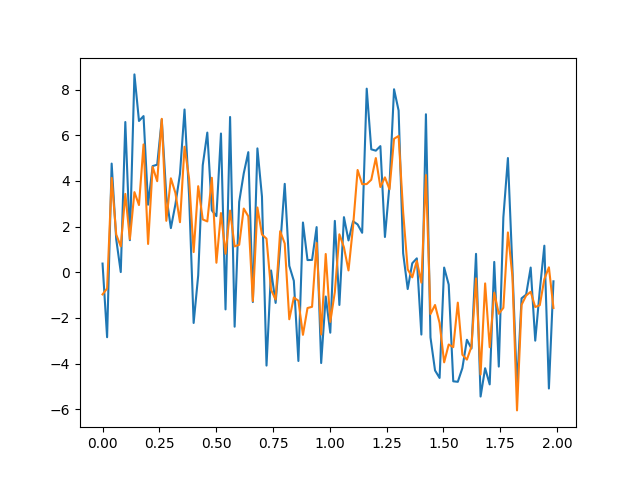

In [13]:
f0 = fr + 1j*fi
z = np.fft.irfft(f0)
low = 0
high = 100
plt.plot(x[low:high], y[low:high])
plt.plot(x[low:high], z[low:high])

# Animation

<IPython.core.display.Javascript object>


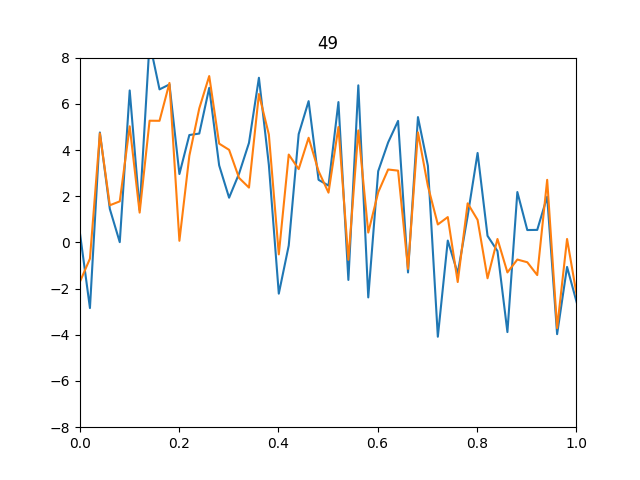

In [19]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-8, 8))

line_og, = ax.plot([], [])
line_fx, = ax.plot([], [])

def init():
    line_og.set_data([], [])
    return (line_og,)

def animate(i):
    fr = f.real.copy()
    fi = f.imag.copy()

    sort_fr = np.argsort(abs(fr))
    sort_fi = np.argsort(abs(fi))

    fr[sort_fr[:-i]] = 0
    fi[sort_fi[:-i]] = 0
    
    f0 = fr + 1j*fi
    z = np.fft.irfft(f0)
    
    line_og.set_data(x, y)
    line_fx.set_data(x, z)
    ax.set_title(i)
    
    return (line_og, line_fx)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, 
                               blit=True)

#HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>


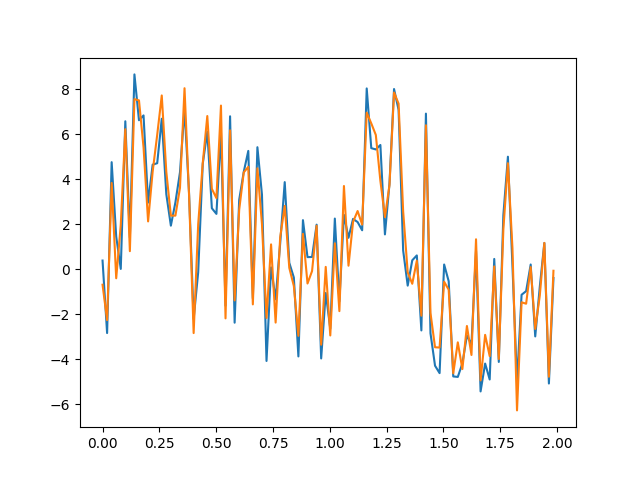

IntSlider(value=0)

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

plotting_data = []
for top in range(101):
    fr = f.real.copy()
    fi = f.imag.copy()

    sort_fr = np.argsort(abs(fr))
    sort_fi = np.argsort(abs(fi))

    if not top:
        _top = None
    else:
        _top = -top
    fr[sort_fr[:_top]] = 0
    fi[sort_fi[:_top]] = 0
    
    #fr[top:] = 0
    #fi[top:] = 0
    
    f0 = fr + 1j*fi
    z = np.fft.irfft(f0)
    low = 0
    high = 100
    
    og = (x[low:high], y[low:high])
    fx = (x[low:high], z[low:high])
    
    plotting_data.append((og, fx))

def fourier_plot(top):
    ax.clear()
    og, fx = plotting_data[top]
    ax.plot(*og)
    ax.plot(*fx)
    fig.canvas.draw()

slider = widgets.IntSlider()
top = 0
fourier_plot(top)
slider.value = top
def on_change(v):
    top = v['new']
    fourier_plot(top)
    
slider.observe(on_change, names='value')
display(slider)

# ML

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## Time Series

Epoch 1/50
4000/4000 [==============================] - 1s 164us/step - loss: 0.0283 - acc: 0.0000e+00
Epoch 2/50
4000/4000 [==============================] - 0s 43us/step - loss: 0.0268 - acc: 0.0000e+00
Epoch 3/50
4000/4000 [==============================] - 0s 45us/step - loss: 0.0270 - acc: 0.0000e+00
Epoch 4/50
4000/4000 [==============================] - 0s 40us/step - loss: 0.0270 - acc: 0.0000e+00
Epoch 5/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.0266 - acc: 0.0000e+00
Epoch 6/50
4000/4000 [==============================] - 0s 42us/step - loss: 0.0267 - acc: 0.0000e+00
Epoch 7/50
4000/4000 [==============================] - 0s 42us/step - loss: 0.0265 - acc: 0.0000e+00
Epoch 8/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.0267 - acc: 0.0000e+00
Epoch 9/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.0266 - acc: 0.0000e+00
Epoch 10/50
4000/4000 [==============================] - 0s 42us/step - loss: 0.0

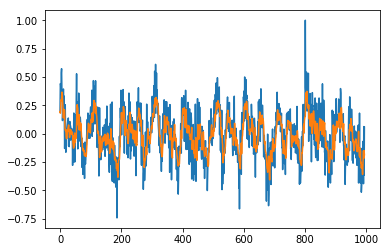

In [164]:
n = 5000
x = np.linspace(0, 100, n)
spacing = x[1] - x[0]
noise = np.random.normal(0,0.5,n)

tau = 2*np.pi
y = np.zeros_like(x)
coefs = [(1, 0.2), (2, 0.5), (3, 1), (0.5, 2), (1.75, 1.75)]
for a, f in coefs:
    y += a*np.sin(f*tau*x) + noise

# Generating ML Data
x_test = []
y_test = []
x_train = []
y_train = []
win = 5
train_ratio = 0.8
for i in range(0,n-win):
    if i < int(n*train_ratio):
        x_train.append(y[i:i+win])
        y_train.append([y[i+win]])
    else:
        x_test.append(y[i:i+win])
        y_test.append([y[i+win]])
    
x_train = np.array(x_train) / max(y)
y_train = np.array(y_train) / max(y)
x_test = np.array(x_test) / max(y)
y_test = np.array(y_test) / max(y)

model = Sequential()
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

model.add(Dense(units=64, activation='relu', input_dim=input_dim))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=y_train.shape[1], activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=50, batch_size=32)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print("Loss:", loss_and_metrics)

prediction = model.predict(x_test)
#plt.xlim([0, 250])
plt.plot(y_test)
plt.plot(prediction)

Epoch 1/50
2000/2000 [==============================] - 1s 280us/step - loss: 3396.4386 - acc: 0.0000e+00
Epoch 2/50
2000/2000 [==============================] - 0s 44us/step - loss: 1357.1573 - acc: 0.0000e+00
Epoch 3/50
2000/2000 [==============================] - 0s 53us/step - loss: 310.4996 - acc: 0.0000e+00
Epoch 4/50
2000/2000 [==============================] - 0s 42us/step - loss: 135.5170 - acc: 0.0000e+00
Epoch 5/50
2000/2000 [==============================] - 0s 43us/step - loss: 75.0507 - acc: 0.0000e+00
Epoch 6/50
2000/2000 [==============================] - 0s 42us/step - loss: 103.2778 - acc: 0.0000e+00
Epoch 7/50
2000/2000 [==============================] - 0s 47us/step - loss: 210.7181 - acc: 0.0000e+00
Epoch 8/50
2000/2000 [==============================] - 0s 44us/step - loss: 4041.0414 - acc: 0.0000e+00
Epoch 9/50
2000/2000 [==============================] - 0s 47us/step - loss: 118.1832 - acc: 0.0000e+00
Epoch 10/50
2000/2000 [==============================] - 0s 4

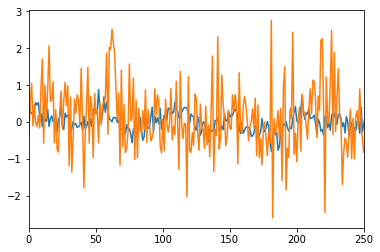

In [160]:
n = 5000
x = np.linspace(0, 100, n)
spacing = x[1] - x[0]
noise = np.random.normal(0,0.5,n)

tau = 2*np.pi
y = np.zeros_like(x)
coefs = [(1, 0.2), (2, 0.5), (3, 1), (0.5, 2), (1.75, 1.75)]
for a, f in coefs:
    y += a*np.sin(f*tau*x) + noise

# Fourier
f = np.fft.rfft(y)
fr = f.real.copy()
fi = f.imag.copy()

sort_fr = np.argsort(abs(fr))
sort_fi = np.argsort(abs(fi))

top = -1
#fr[sort_fr[:_top]] = 0
#fi[sort_fi[:_top]] = 0

#fr[top:] = 0
#fi[top:] = 0

f0 = fr + 1j*fi
z = np.fft.irfft(f0)
    
# Generating ML Data
x_test = []
y_test = []
x_train = []
y_train = []
win = 5
train_ratio = 0.8
for i in range(0, len(fr) - win):
    if i < int(len(fr)*train_ratio):
        x_train.append(np.concatenate((fr[i:i+win], fi[i:i+win])))
        y_train.append([y[i+win]])
    else:
        x_test.append(np.concatenate((fr[i:i+win], fi[i:i+win])))
        y_test.append([y[i+win]])
    
x_train = np.array(x_train) / max(y)
y_train = np.array(y_train) / max(y)
x_test = np.array(x_test) / max(y)
y_test = np.array(y_test) / max(y)

model = Sequential()
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

model.add(Dense(units=64, activation='relu', input_dim=input_dim))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=y_train.shape[1], activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=50, batch_size=32)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print("Loss:", loss_and_metrics)

prediction = model.predict(x_test)
plt.xlim([0, 250])
plt.plot(y_test)
plt.plot(prediction)

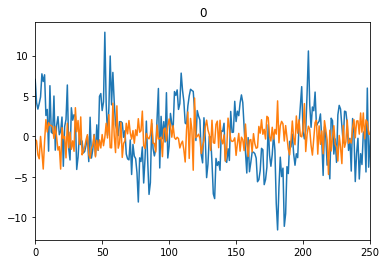

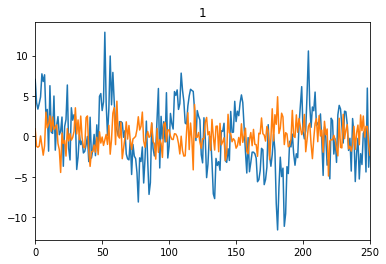

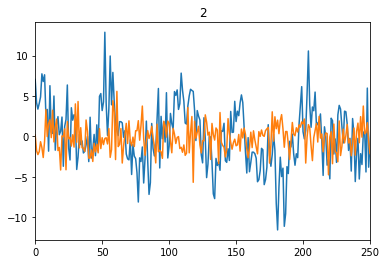

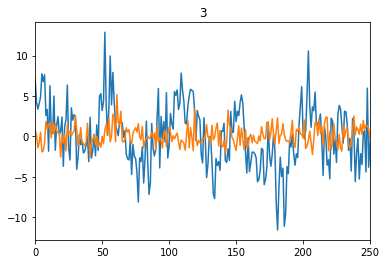

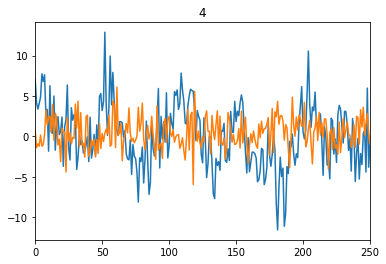

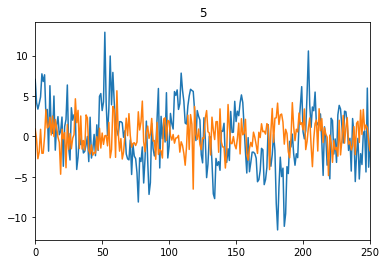

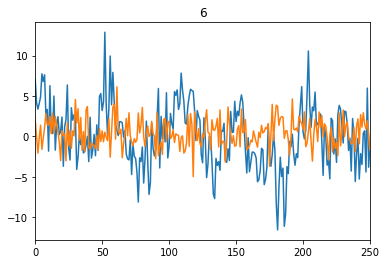

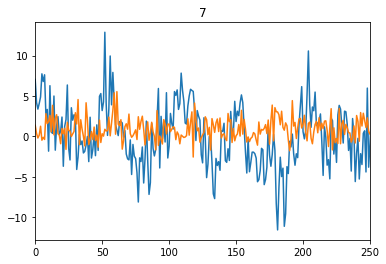

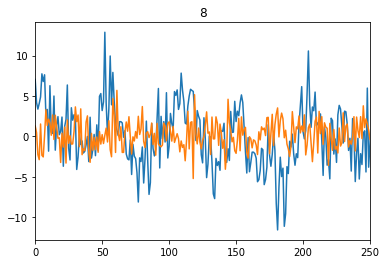

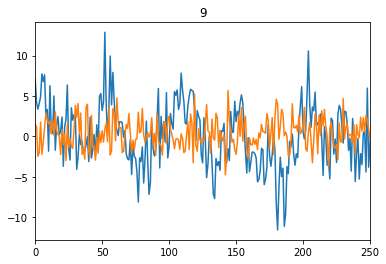

In [163]:
for i in range(10):
    # x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    prediction = model.predict(x_test)
    plt.xlim([0, 250])
    plt.title(i)
    plt.plot(y_test)
    plt.plot(prediction)
    plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

plotting_data = []
for top in range(101):
    fr = f.real.copy()
    fi = f.imag.copy()

    sort_fr = np.argsort(abs(fr))
    sort_fi = np.argsort(abs(fi))

    if not top:
        _top = None
    else:
        _top = -top
    fr[sort_fr[:_top]] = 0
    fi[sort_fi[:_top]] = 0
    
    #fr[top:] = 0
    #fi[top:] = 0
    
    f0 = fr + 1j*fi
    z = np.fft.irfft(f0)
    low = 0
    high = 100
    
    og = (x[low:high], y[low:high])
    fx = (x[low:high], z[low:high])
    
    plotting_data.append((og, fx))

def fourier_plot(top):
    ax.clear()
    og, fx = plotting_data[top]
    ax.plot(*og)
    ax.plot(*fx)
    fig.canvas.draw()

slider = widgets.IntSlider()
top = 0
fourier_plot(top)
slider.value = top
def on_change(v):
    top = v['new']
    fourier_plot(top)
    
slider.observe(on_change, names='value')
display(slider)